In [11]:
!pip install tensorflow

In [12]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [13]:
!pip install scipy

In [14]:
!pip install seaborn

In [15]:
!pip install matplotlib

In [32]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# Parameter
IMG_SIZE = (224, 224)  # Ukuran gambar untuk MobileNetV2
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

In [18]:
# Direktori dataset
train_dir = "train"
test_dir = "test"

In [19]:
# Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [20]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [21]:
# Generator Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 6881 images belonging to 116 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 1292 images belonging to 116 classes.


In [23]:
# Informasi jumlah kelas
num_classes = len(train_generator.class_indices)

In [24]:
# Model Transfer Learning
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Bekukan layer pada model dasar

In [25]:
# Tambahkan lapisan khusus
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # Dropout untuk mencegah overfitting
x = Dense(128, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

In [26]:
# Buat model
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [28]:
# Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 45/216 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.0776 - loss: 4.5605

KeyboardInterrupt: 

In [ ]:
model.save("modelr_11_20_epochs.h5")  # Menyimpan model ke file my_model.h5

In [ ]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 4.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 4.0 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.0 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 4.1 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 4.1 MB/s eta 0:00:01
   --

In [34]:

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = load_model("modelr_11_20_epochs.h5")
# Ambil prediksi dari model
predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Konversi prediksi ke kelas
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label yang sebenarnya dari data uji
true_classes = test_generator.classes

# Hitung confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 818ms/step


ValueError: Found input variables with inconsistent numbers of samples: [1292, 1280]

In [36]:
print(f"Jumlah sampel pada data uji: {train_generator.samples}")
print(f"Jumlah batch pada data uji: {len(train_generator)}")


Jumlah sampel pada data uji: 6881
Jumlah batch pada data uji: 216


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 822ms/step
Jumlah kelas yang benar: 1292
Jumlah prediksi yang dibuat: 1292


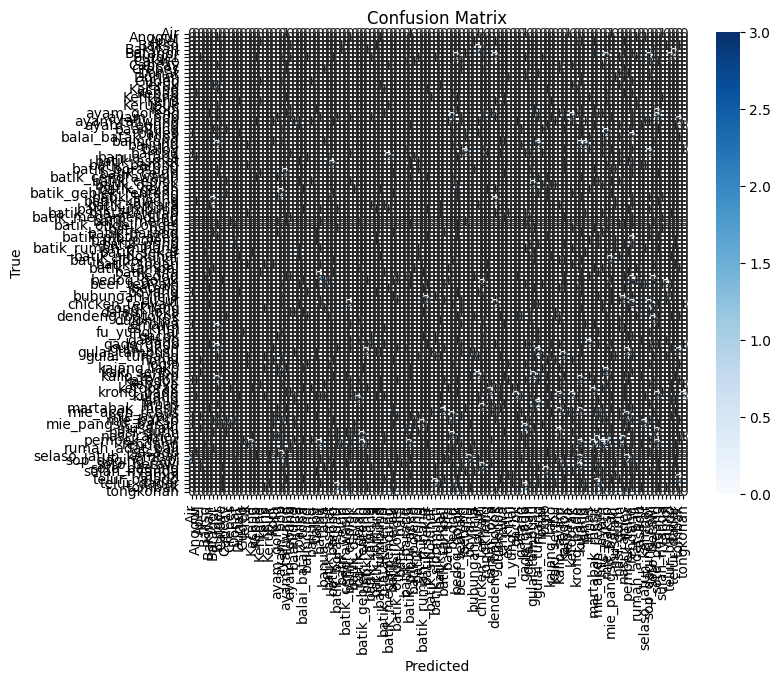

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Memuat model
model = load_model("model_10_20_epochs.h5")

# Ambil prediksi dari model
steps = int(np.ceil(test_generator.samples / BATCH_SIZE))  # Pastikan steps adalah integer
predictions = model.predict(test_generator, steps=steps, verbose=1)

# Konversi prediksi ke kelas
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label yang sebenarnya dari data uji
true_classes = test_generator.classes

# Pastikan jumlah kelas sesuai
print(f"Jumlah kelas yang benar: {len(true_classes)}")
print(f"Jumlah prediksi yang dibuat: {len(predicted_classes)}")

# Hitung confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Found 1292 images belonging to 116 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


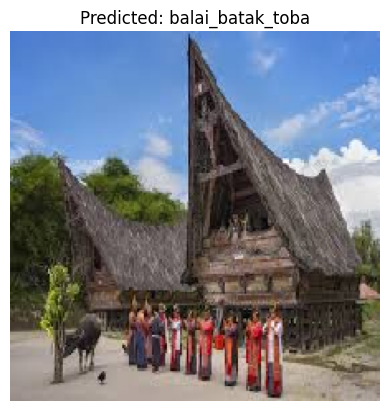

Predicted Label: balai_batak_toba
Prediction Probabilities: [6.26261087e-09 6.79243661e-10 1.08881383e-10 9.79807624e-11
 3.60898422e-10 8.64421208e-12 1.03828224e-09 6.28811447e-10
 2.20403626e-11 2.28750551e-07 2.86542543e-11 1.31837807e-09
 2.68622014e-09 1.03234548e-11 1.40773826e-09 1.50541538e-07
 1.57340040e-07 5.29629807e-09 3.08479131e-10 1.20908306e-08
 5.38154438e-07 1.36458155e-07 4.89534422e-08 5.81469273e-09
 2.06757932e-06 8.77021812e-04 9.40782428e-01 2.68329245e-06
 8.02307623e-05 8.46287890e-07 1.84737090e-07 4.11672636e-06
 1.08902460e-08 6.17924156e-10 1.19115406e-07 3.55549479e-09
 1.32456641e-08 3.95895805e-09 7.20750615e-09 1.41486889e-09
 1.68425993e-06 3.70577347e-08 4.05238426e-10 1.38201255e-08
 2.53744292e-09 1.27215599e-10 2.08968329e-11 3.49557300e-10
 3.14805237e-10 3.78666698e-09 1.38800393e-08 8.78093320e-10
 6.45406999e-08 9.97912775e-09 2.35942643e-08 1.10148290e-09
 5.74019680e-07 1.50612763e-07 1.33594398e-07 9.04705200e-09
 3.99556610e-10 4.3835095

In [68]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Fungsi untuk mengklasifikasikan gambar tunggal
def classify_single_image(image_path, model, test_generator, img_size=(224, 224)):
    # Memuat gambar
    img = image.load_img(image_path, target_size=img_size)
    
    # Mengubah gambar menjadi array numpy
    img_array = image.img_to_array(img)
    
    # Normalisasi gambar (menggunakan rescaling seperti di preprocessing data)
    img_array = img_array / 255.0
    
    # Menambahkan dimensi batch (karena model mengharapkan input berupa batch)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Prediksi kelas gambar
    predictions = model.predict(img_array)
    
    # Mendapatkan kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(predictions, axis=1)
    
    # Mengambil label kelas dari test_generator
    class_labels = list(test_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]
    
    # Menampilkan gambar dan hasil prediksi
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label, predictions[0]

# Memuat model yang sudah dilatih
model = load_model("model_10_20_epochs.h5")

# Memuat test_generator yang digunakan saat pelatihan
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    "test",  # Ganti dengan direktori data uji Anda
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Uji dengan gambar tunggal
image_path = "test/download (1).jpg"  # Ganti dengan path gambar yang ingin Anda klasifikasikan
predicted_label, prediction_probs = classify_single_image(image_path, model, test_generator)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probs}")
